In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df=pd.read_csv("happynessscore.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# To find the happiness score on basis of given data
As happiness score is a continous value so the dataset comes in the linear regression model

In [3]:
df.shape

(158, 12)

In [4]:
df.info()#their is no null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.describe()# no much difference in 75%and max value so we can see no outliers

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [7]:
df.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [8]:
rd=df['Region']

In [9]:
df['Country'] = df['Country'].astype('category').cat.codes
df['Region'] = df['Region'].astype('category').cat.codes

In [10]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


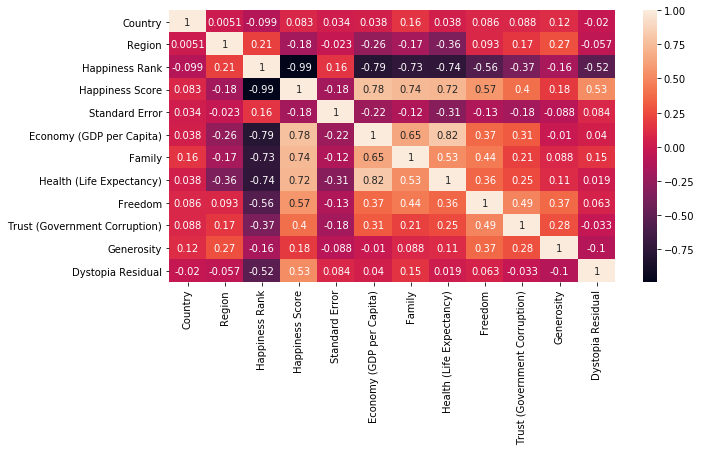

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot= True,)#here we see that 4 variable is strongly effecting the happiness score i.e. family,freedom, health and economy directly.
#

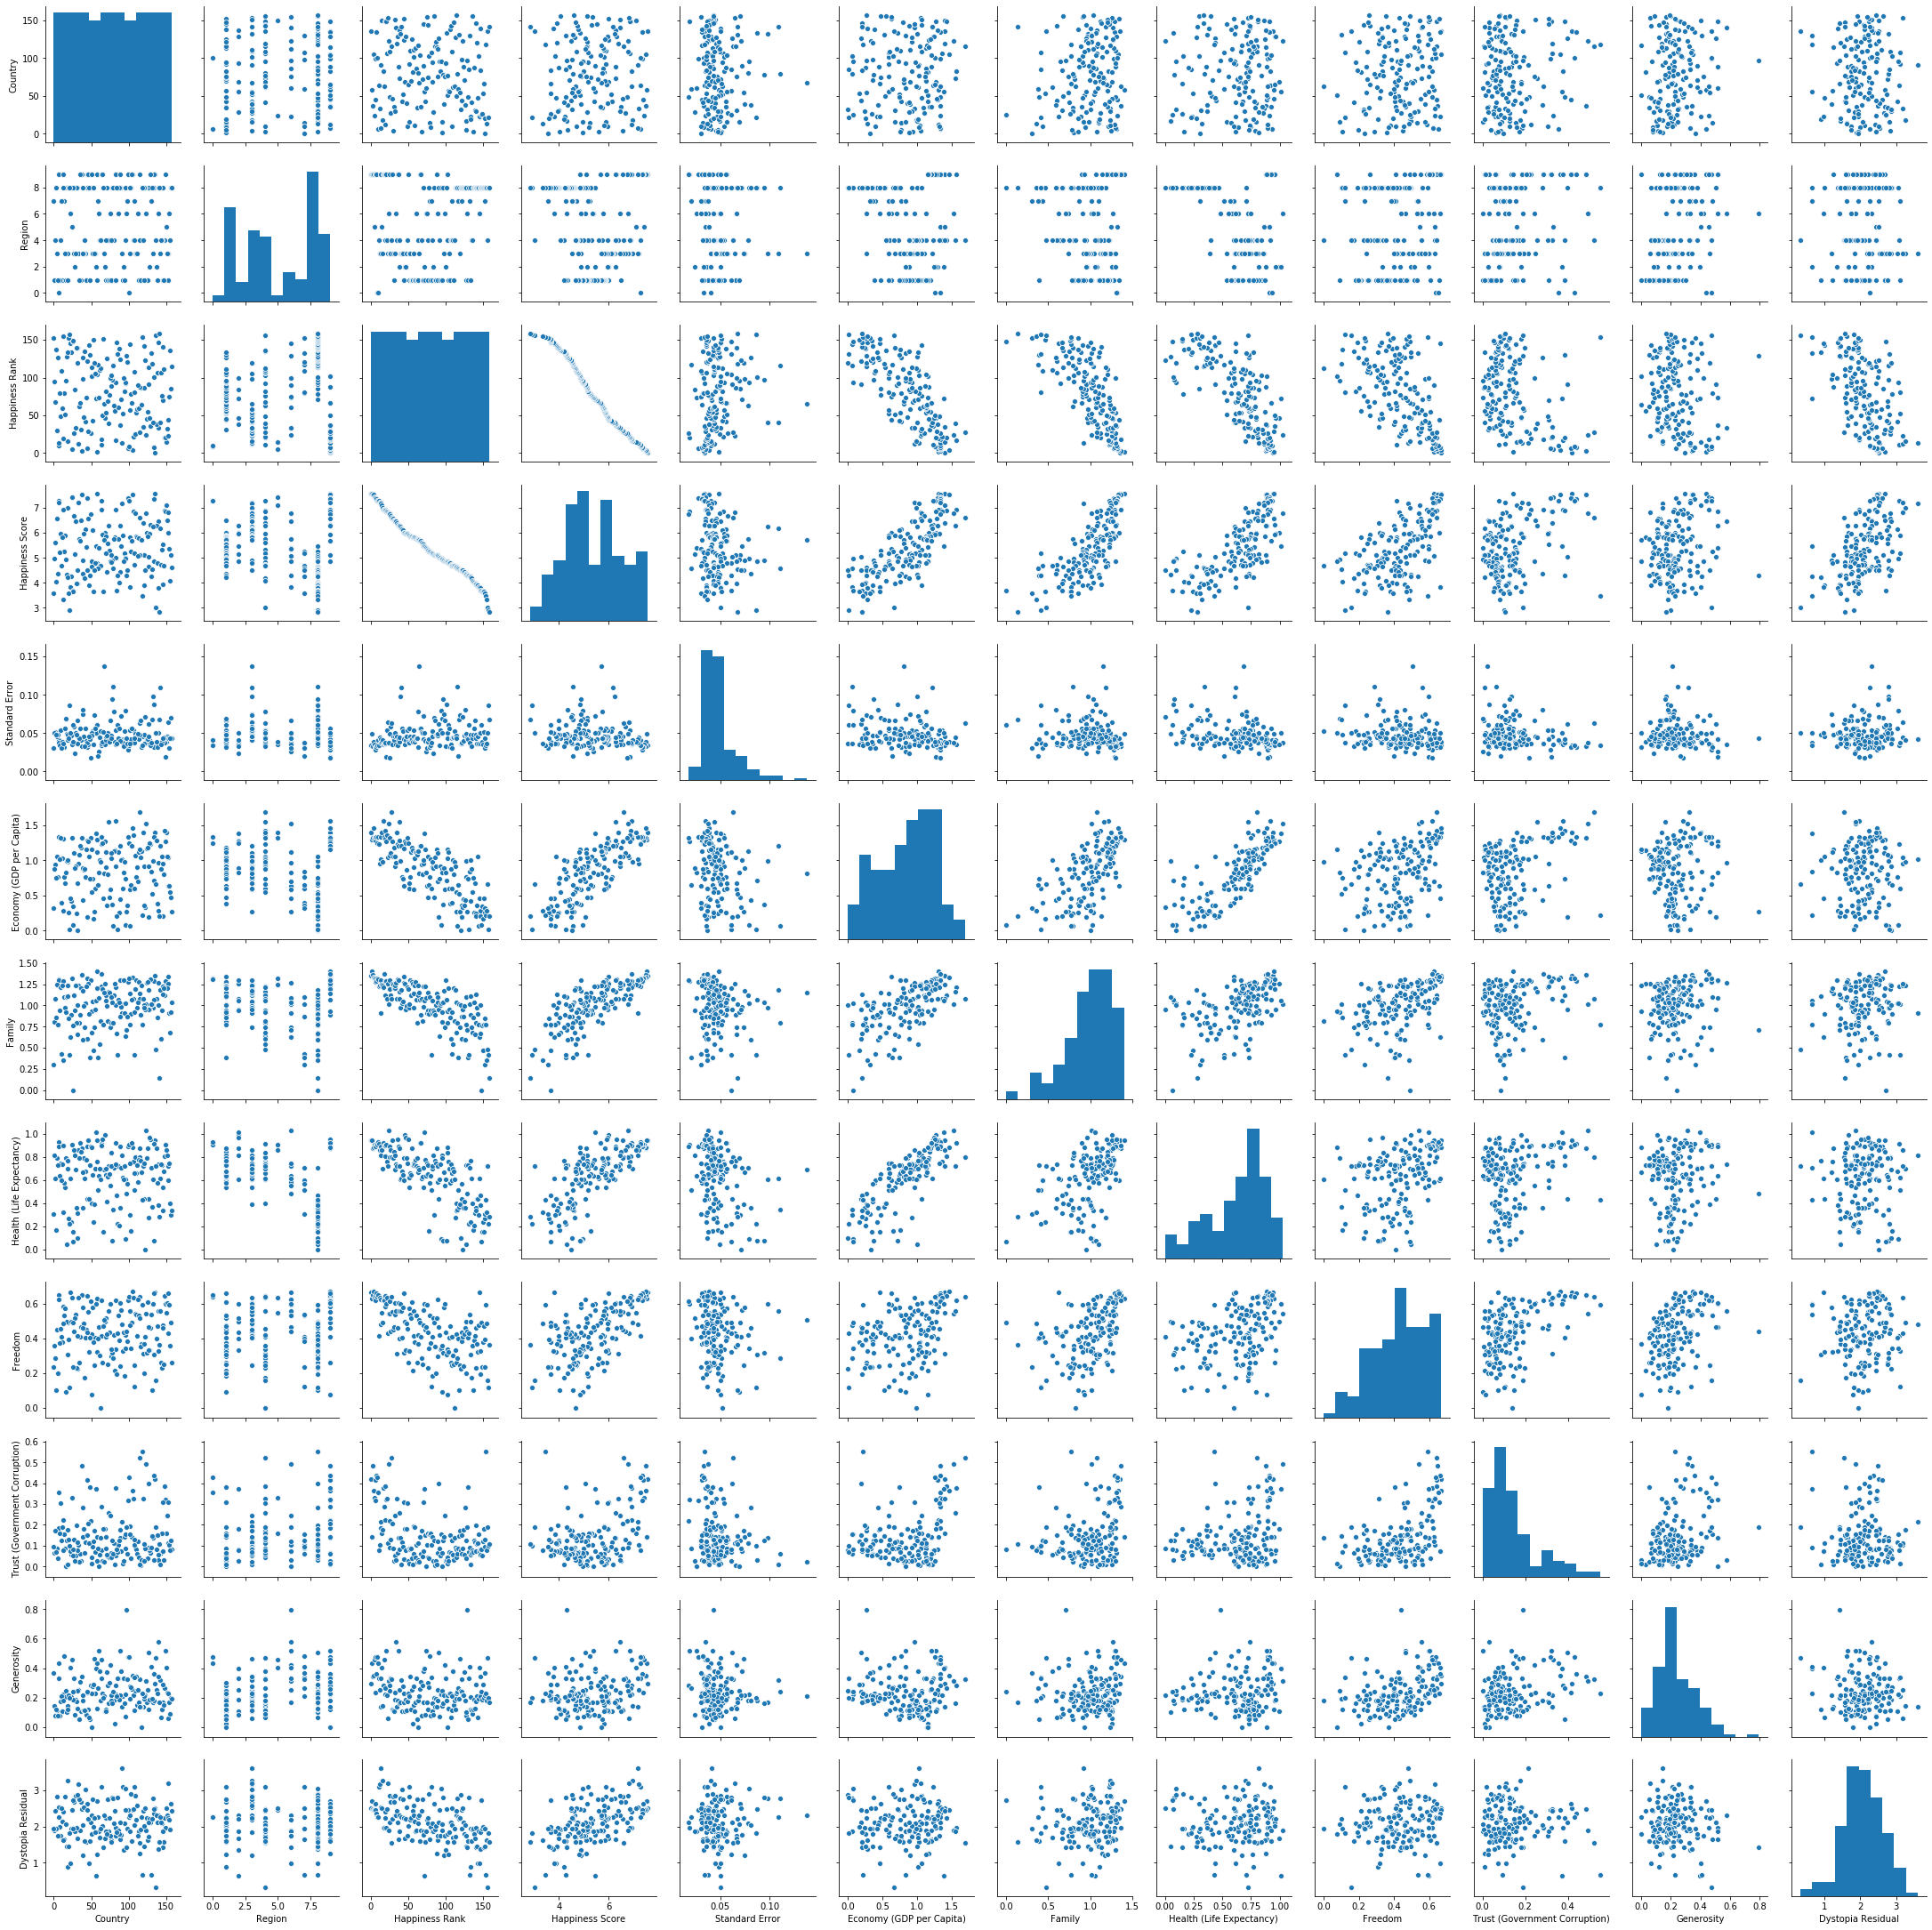

In [12]:
sns.pairplot(df)#we can see dat happiness score is inversely related to happiness score but we can find happines rank if we hav happiness score so we take happiness score to be targeted variable.

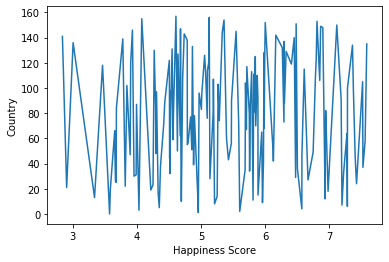

In [13]:
sns.lineplot(x='Happiness Score',y='Country',data=df) # to check impact on target
plt.show()

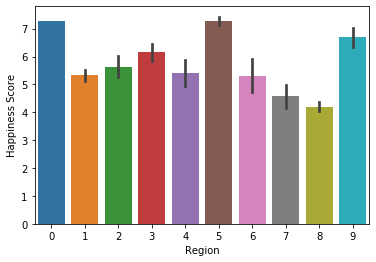

In [14]:
sns.barplot(x='Region',y='Happiness Score',data=df) # to check impact on target
plt.show()

In [15]:
#as we can analyis from above that standard error and dystopia residual is not affecting much to ou happiness score coz 
# dystopia residual is for imaginary counry margin of happiness score
# we r droping region because we have country by which we can perdict the score

fd=df['Happiness Rank']
y=df['Happiness Score']
df=df.drop(columns=['Standard Error','Happiness Score','Happiness Rank','Region','Dystopia Residual'],axis=1)

In [16]:
df.skew()

Country                          0.000000
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
dtype: float64

In [17]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
d=pt.fit_transform(df)
d=pd.DataFrame(d,columns=df.columns)
df=d

In [18]:
df.skew()

Country                         -0.279791
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
dtype: float64

In [19]:
df.head()# as we can see the data is in scaller form so no need to standard scalling.

,Country,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.171069,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391
1,-0.344327,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995
2,-0.845092,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973
3,0.620972,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080
4,-1.195601,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224


In [21]:
x=df
x.head()

,Country,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.171069,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391
1,-0.344327,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995
2,-0.845092,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973
3,0.620972,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080
4,-1.195601,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224


In [22]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [23]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  93  is  0.8363917580283226


In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

-24.452581963160988

In [25]:
# max random state is 93
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=93)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [26]:
print("error:")
print("r2 score is: ",r2_score(y_test,y_pred))
print("root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

error:
r2 score is:  0.8363917580283226
root Mean squared error:  0.43721342267277924


In [27]:
from sklearn.externals import joblib

In [28]:
joblib.dump(lreg,'happyscore.pkl')

['happyscore.pkl']

In [29]:
model=joblib.load('happyscore.pkl')

In [30]:
model.predict(x_test.head())

array([5.90184502, 7.0769793 , 3.75273987, 6.96956931, 6.82577996])

In [31]:
y_test.head()

63     5.716
4      7.427
154    3.340
20     6.867
28     6.575
Name: Happiness Score, dtype: float64